In [1]:
!echo %cd%


c:\Users\Leonardo\Documents\Universita\CVCS\PRJ


In [25]:
!python inference_realesrgan.py -g 0

Start procedur..
Start main..
Model path..
Start For loop..
Testing 0 test_p001
Saving..


In [98]:
import torch
model_path_f = "C:\\Users\\Leonardo\\Documents\\Universita\\CVCS\\PRJ\\Real-ESRGAN-master\\weights\\RealESRGAN_x4plus.pth"
loadnet = torch.load(model_path_f, map_location=torch.device('cpu'))

model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
netscale = 4
keyname = "params_ema"
model.load_state_dict(loadnet[keyname], strict=True)
model.eval()
model = model.to("cuda")

In [15]:
import os
os.chdir("Real-ESRGAN-master")

In [99]:
from basicsr.archs.rrdbnet_arch import RRDBNet

model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
netscale = 4
keyname = "params_ema"
model.load_state_dict(loadnet[keyname], strict=True)
model.eval()
model = model.to("cuda")

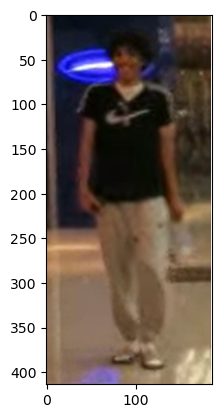

In [109]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [111]:
from realesrgan import utils
upsampler = utils.RealESRGANer(
        scale=netscale, # Netscale che diciamo noi
        model_path=model_path_f,  # Pesi che diciamo noi
        dni_weight=None, # ? ? ?, None suppongo a meno che non usiamo reales-general-x4v3
        model=model,    # Modello
        tile=0, # Tile size, 0 for testing
        tile_pad=10, # default 10 , tile padding
        pre_pad=0,   # def 0, prepadding size
        half=True, # Precision 16 or 32 fp, default fp16
        gpu_id=0)

In [112]:
im_out = upsampler.enhance(img)

In [113]:
im_out

(array([[[ 92,  97, 120],
         [ 92,  98, 124],
         [ 94, 100, 123],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 93,  97, 117],
         [ 94,  99, 122],
         [ 95, 100, 123],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 94,  98, 121],
         [ 92,  99, 122],
         [ 94, 100, 122],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[ 91, 117, 145],
         [ 89, 115, 143],
         [ 89, 114, 144],
         ...,
         [242, 252, 255],
         [244, 255, 255],
         [251, 255, 255]],
 
        [[ 90, 116, 146],
         [ 89, 114, 146],
         [ 88, 113, 144],
         ...,
         [239, 252, 255],
         [246, 255, 255],
         [248, 255, 255]],
 
        [[ 91, 113, 140],
         [ 87, 116, 146],
         [ 90, 115, 146],
         ...,
         [241, 252, 255],
  

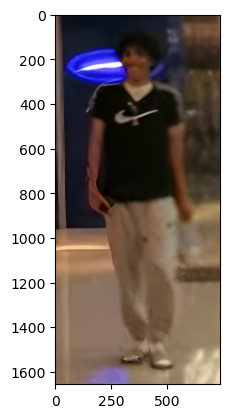

In [115]:

plt.imshow(cv2.cvtColor(im_out[0],cv2.COLOR_BGR2RGB))


plt.show()


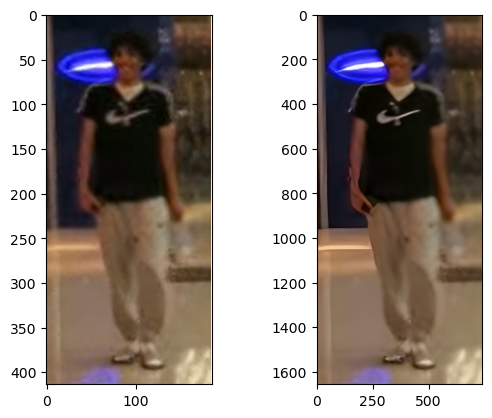

In [116]:
fig = plt.figure()

fig.add_subplot(1,2,1)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
fig.add_subplot(1,2,2)

plt.imshow(cv2.cvtColor(im_out[0],cv2.COLOR_BGR2RGB))

In [117]:
import numpy as np
kernel = torch.ones((3,3),dtype=float)
kernel/=9


In [118]:
input = torch.tensor(img.transpose(2,0,1))

In [165]:
import torch

H=input.shape[1]
W=input.shape[2]
kH=kernel.shape[0]
kW=kernel.shape[1]
 
oH = (H-kH+1)
oW = (W-kW+1)
out=torch.zeros((3,oH,oW))

for y in range(oH):
  for i in range(oW):
      out[:,y,i]=(input[:,y:y+kH,i:i+kW]*kernel.unsqueeze(0)).sum(axis=(1,2))

In [166]:
img_filtered = out.int().detach().numpy().transpose(1,2,0)

In [167]:
img_filtered=img_filtered.astype(np.uint8)

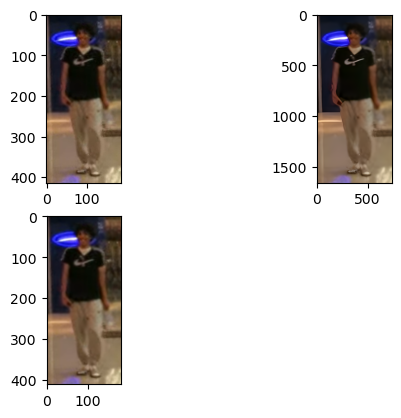

In [168]:
import matplotlib.pyplot as plt
fig = plt.figure()

fig.add_subplot(2,2,1)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
fig.add_subplot(2,2,2)

plt.imshow(cv2.cvtColor(im_out[0],cv2.COLOR_BGR2RGB))
fig.add_subplot(2,2,3)

plt.imshow(cv2.cvtColor(img_filtered,cv2.COLOR_BGR2RGB))
#plt.imshow(img_filtered)

In [169]:
im_f_SR = upsampler.enhance(img_filtered)

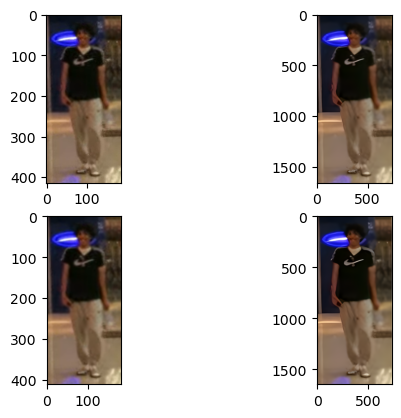

In [170]:
import matplotlib.pyplot as plt
fig = plt.figure()

fig.add_subplot(2,2,1)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
fig.add_subplot(2,2,2)

plt.imshow(cv2.cvtColor(im_out[0],cv2.COLOR_BGR2RGB))
fig.add_subplot(2,2,3)

plt.imshow(cv2.cvtColor(img_filtered,cv2.COLOR_BGR2RGB))
#plt.imshow(img_filtered)
fig.add_subplot(2,2,4)

plt.imshow(cv2.cvtColor(im_f_SR[0],cv2.COLOR_BGR2RGB))

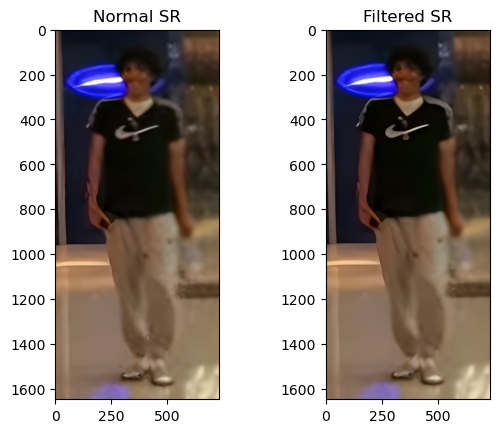

In [180]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text("Normal SR")
plt.imshow(cv2.cvtColor(im_out[0][:1648,:732,:],cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text("Filtered SR")
plt.imshow(cv2.cvtColor(im_f_SR[0],cv2.COLOR_BGR2RGB))

In [280]:
def gaussian_blur(img):
    kernel = np.ones((5,5),np.float32)/25
    return cv2.filter2D(img,-1,kernel)

def noise_addiction(img):
    noise = np.random.normal(size=img.shape)
    noise = noise.astype(np.float32)
    img = img.astype(np.float32)

    res= img + noise

    res = res.astype(np.uint8)
    return res

def downsampling(img,scale):
    H,W,C = img.shape
    H /= scale
    W /= scale
    dim = (int(W), int(H))
    print(f"W: {dim[0]}, H: {dim[1]}")
    res = cv2.resize(img,dim,interpolation=cv2.INTER_NEAREST)
    return res


def image_degradation(img,scale = 2):
    res=img
    # Gaussian Blur
    res = gaussian_blur(res)
    # Noise addiction
    res = noise_addiction(res)
    # Downsampling
    res = downsampling(res, scale)
    #Jpeg Compression
    return res

In [281]:
imgGT = cv2.imread("..\\PedestrianGT.png")
imgGT = cv2.cvtColor(imgGT, cv2.COLOR_BGR2RGB)

W: 108, H: 170
W: 54, H: 85


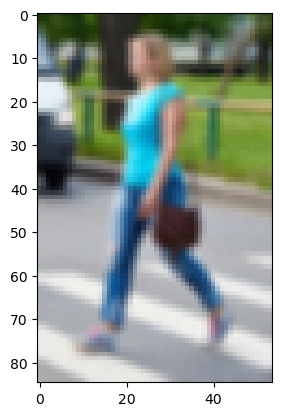

In [282]:
deg2img = image_degradation(image_degradation(imgGT,2),2)

plt.imshow(deg2img)

In [283]:
SR2img,_ = upsampler.enhance(deg2img)

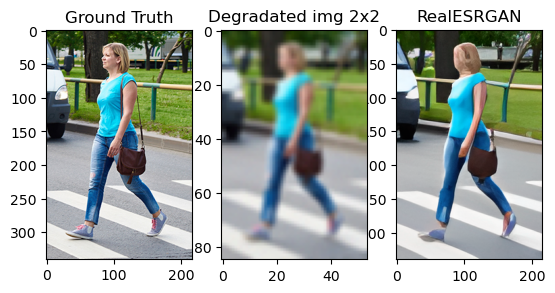

In [293]:
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text("Ground Truth")
plt.imshow(imgGT)
ax3 = fig.add_subplot(1,3,3)
ax3.title.set_text("RealESRGAN")
plt.imshow(SR2img)
ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text("Degradated img 2x2")
plt.imshow(deg2img)

In [285]:
deg1img = image_degradation(imgGT,4)
SR1img,_ = upsampler.enhance(deg1img)

W: 54, H: 85


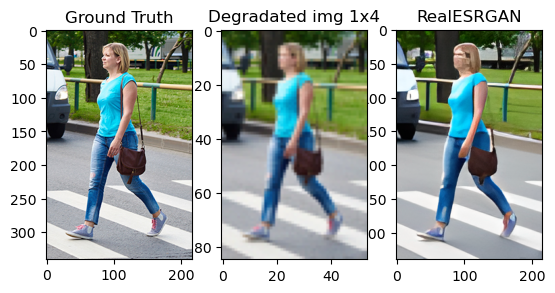

In [292]:
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text("Ground Truth")
plt.imshow(imgGT)
ax3 = fig.add_subplot(1,3,3)
ax3.title.set_text("RealESRGAN")
plt.imshow(SR1img)
ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text("Degradated img 1x4")
plt.imshow(deg1img)

In [287]:
def mse_gray(gt,sr):
    diff = (gt-sr)**2
    sum = diff.sum()
    val = sum/(gt.shape[0]*gt.shape[1])
    return val 

def MSE(GT, SR):
    redGT = GT[:,:,0]
    redSR = SR[:,:,0]
    greenGT = GT[:,:,1]
    greenSR = SR[:,:,1]
    blueGT = GT[:,:,2]
    blueSR = SR[:,:,2]

    mse_r = mse_gray(redGT,redSR)
    mse_g = mse_gray(greenGT,greenSR)
    mse_b = mse_gray(blueGT,blueSR)

    return (mse_r+mse_g+mse_b)/3.0

In [288]:
SR1img.shape

(340, 216, 3)

In [289]:
imgGT.shape

(340, 217, 3)

In [291]:
# MSE con RealESRGAN

print(MSE(imgGT[:,:216,:],SR1img))
print(MSE(imgGT[:,:216,:],SR2img))

68.56500998547567
69.50530591866378


In [295]:
os.chdir("..")

In [303]:
cv2.imwrite("pedestrinan_deg_2x2.png",cv2.cvtColor(deg2img,cv2.COLOR_RGB2BGR))

True

In [304]:
os.chdir("UnpairedSR/codes/config/PDM-SR/")
!python inference.py -opt ./options/test/2020Track2.yml 
os.chdir("../../../../")

export CUDA_VISIBLE_DEVICES=0



0it [00:00, ?it/s]
1it [00:01,  1.73s/it]
1it [00:01,  1.73s/it]


In [306]:
pdm_sr = cv2.imread("pedestrinan_deg_2x2_x4.png")
pdm_sr = cv2.cvtColor(pdm_sr, cv2.COLOR_BGR2RGB)

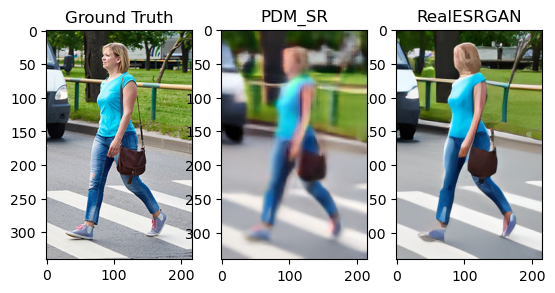

In [309]:
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text("Ground Truth")
plt.imshow(imgGT)
ax3 = fig.add_subplot(1,3,3)
ax3.title.set_text("RealESRGAN")
plt.imshow(SR2img)
ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text("PDM_SR")
plt.imshow(pdm_sr)

In [310]:
print(MSE(imgGT[:,:216,:],pdm_sr))
print(MSE(imgGT[:,:216,:],SR2img))

82.61696169208425
69.50530591866378


In [312]:
from realesrgan import utils
upsampler_x1 = utils.RealESRGANer(
        scale=1, # Netscale che diciamo noi
        model_path=model_path_f,  # Pesi che diciamo noi
        dni_weight=None, # ? ? ?, None suppongo a meno che non usiamo reales-general-x4v3
        model=model,    # Modello
        tile=0, # Tile size, 0 for testing
        tile_pad=10, # default 10 , tile padding
        pre_pad=0,   # def 0, prepadding size
        half=True, # Precision 16 or 32 fp, default fp16
        gpu_id=0)

In [313]:
test1,_  = upsampler_x1.enhance(deg2img)

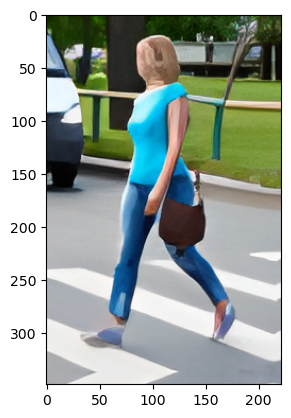

In [316]:
plt.imshow(test1)

## 21 - 12 - 22
Test SR su  pedestrian lontani


In [1]:
!echo %cd%

c:\Users\Leonardo\Documents\Universita\CVCS\PRJ


In [4]:
import os
os.chdir("Real-ESRGAN-master")

In [5]:
import cv2
import torch
import numpy as np
from realesrgan import utils
from basicsr.archs.rrdbnet_arch import RRDBNet


model_path_f = "C:\\Users\\Leonardo\\Documents\\Universita\\CVCS\\PRJ\\Real-ESRGAN-master\\weights\\RealESRGAN_x4plus.pth"
loadnet = torch.load(model_path_f, map_location=torch.device('cpu'))

model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
netscale = 4
keyname = "params_ema"
model.load_state_dict(loadnet[keyname], strict=True)
model.eval()
model = model.to("cuda")

upsampler = utils.RealESRGANer(
        scale=netscale, # Netscale che diciamo noi
        model_path=model_path_f,  # Pesi che diciamo noi
        dni_weight=None, # ? ? ?, None suppongo a meno che non usiamo reales-general-x4v3
        model=model,    # Modello
        tile=0, # Tile size, 0 for testing
        tile_pad=10, # default 10 , tile padding
        pre_pad=0,   # def 0, prepadding size
        half=True, # Precision 16 or 32 fp, default fp16
        gpu_id=0)

c:\Users\Leonardo\anaconda3\envs\generic\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
model2 = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=2)
netscale2 = 2
model_path_x2 = "C:\\Users\\Leonardo\\Documents\\Universita\\CVCS\\PRJ\\Real-ESRGAN-master\\weights\\RealESRGAN_x2plus.pth"

loadnet2 = torch.load(model_path_f, map_location=torch.device('cpu'))

keyname = "params_ema"
model.load_state_dict(loadnet2[keyname], strict=True)
model2.eval()
model2 = model2.to("cuda")

upsampler_x2 = utils.RealESRGANer(
        scale=netscale2, # Netscale che diciamo noi
        model_path=model_path_x2,  # Pesi che diciamo noi
        dni_weight=None, # ? ? ?, None suppongo a meno che non usiamo reales-general-x4v3
        model=model2,    # Modello
        tile=0, # Tile size, 0 for testing
        tile_pad=10, # default 10 , tile padding
        pre_pad=0,   # def 0, prepadding size
        half=True, # Precision 16 or 32 fp, default fp16
        gpu_id=0)

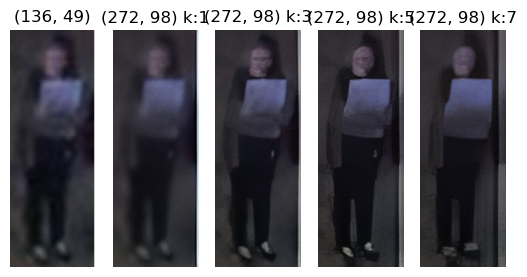

In [9]:
img = cv2.cvtColor(cv2.imread("..\\pedestrian_small_02.png"), cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt


fig = plt.figure()
ax=list()

ax.append(fig.add_subplot(1,5,1))
ax[0].title.set_text(f"{img.shape[:2]}")
plt.axis("off")
plt.margins(x=0)
plt.imshow(img)



for i in range(4):
    val = i * 2 + 1
    kernel = np.ones((val,val),dtype=np.float32)/(val*val)

    if i != 0:
        img_f = cv2.filter2D(img,-1,kernel)
    else:
        img_f=img
    
    res,_ = upsampler_x2.enhance(img_f)
    

    ax.append(fig.add_subplot(1,5,i+2))
    ax[i+1].title.set_text(f"{res.shape[:2]} k:{val}")
    plt.axis("off") 
    plt.margins(x=0)
    plt.imshow(res)






In [10]:
import cv2

def gaussian_blur(img):
    kernel = np.ones((5,5),np.float32)/25
    return cv2.filter2D(img,-1,kernel)

def noise_addiction(img):
    noise = np.random.normal(loc=0., scale=1., size=img.shape)
    noise = noise.astype(np.float32)
    img = img.astype(np.float32)

    res= img + noise

    res = res.astype(np.uint8)
    return res

def downsampling(img,scale):
    H,W,C = img.shape
    H /= scale
    W /= scale
    dim = (int(W), int(H))
    print(f"W: {dim[0]}, H: {dim[1]}")
    res = cv2.resize(img,dim,interpolation=cv2.INTER_NEAREST)
    return res

def jpeg_compression(img):
    tmp = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite("./.tmp.jpeg",tmp,[int(cv2.IMWRITE_JPEG_QUALITY), 75])
    return cv2.cvtColor(cv2.imread("./.tmp.jpeg"),cv2.COLOR_BGR2RGB)


def image_degradation(img,scale = 2):
    res=img
    # Gaussian Blur
    res = gaussian_blur(res)
    # Noise addiction
    res = noise_addiction(res)
    # Downsampling
    res = downsampling(res, scale)
    #Jpeg Compression
    res = jpeg_compression(res)
    return res

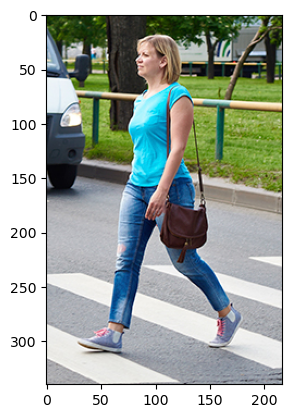

In [11]:
img = cv2.cvtColor(cv2.imread("..\\PedestrianGT.png"), cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [ ]:
res_x2 = upsampler_x2.enhance(image_degradation(img))[0]

plt.imshow(up)

In [22]:
import cv2

img = cv2.imread("..\\317_058.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = upsampler_x2.enhance(img)[0]

cv2.imwrite("..\\317_058_x2.jpg", cv2.cvtColor(res, cv2.COLOR_RGB2BGR))

True

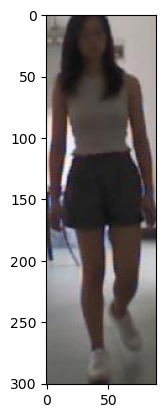

In [18]:
plt.imshow(img)

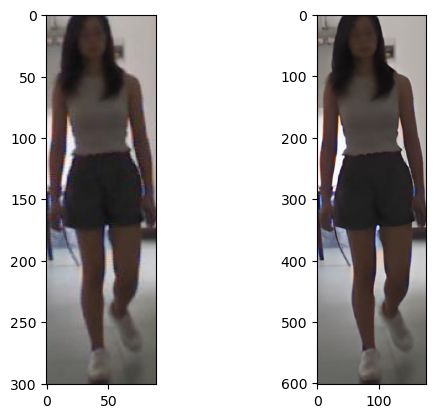

In [24]:
fig = plt.figure()

ax1=fig.add_subplot(1,2,1)
plt.imshow(img)
ax2=fig.add_subplot(1,2,2)
plt.imshow(res)

In [26]:
import lpips

In [28]:
import cv2

img = cv2.imread("..\\PedestrianGT.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = upsampler_x2.enhance(image_degradation(img))[0]



W: 108, H: 170


In [41]:
res.shape

(340, 216, 3)

In [43]:
img = img[:,:216,:]

In [45]:
loss_fn_alex = lpips.LPIPS(net='alex') # best forward scores
loss_fn_vgg = lpips.LPIPS(net='vgg') # closer to "traditional" perceptual loss, when used for optimization

import torch
img0 = torch.tensor((img.astype(np.float32)-127)/128).unsqueeze(0) # image should be RGB, IMPORTANT: normalized to [-1,1]
img1 = torch.tensor((res.astype(np.float32)-127)/128).unsqueeze(0)

img0 = img0.transpose(1,3)
img1 = img1.transpose(1,3)
d = loss_fn_alex(img0, img1)
print(d)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


c:\Users\Leonardo\anaconda3\envs\generic\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Leonardo\anaconda3\envs\generic\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\Leonardo\anaconda3\envs\generic\lib\site-packages\lpips\weights\v0.1\alex.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


c:\Users\Leonardo\anaconda3\envs\generic\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\Leonardo\anaconda3\envs\generic\lib\site-packages\lpips\weights\v0.1\vgg.pth
tensor([[[[0.1910]]]], grad_fn=<AddBackward0>)


In [37]:
img0

array([[[-0.7421875, -0.59375  , -0.9453125],
        [-0.8203125, -0.609375 , -0.9296875],
        [-0.875    , -0.671875 , -0.9453125],
        ...,
        [-0.7890625, -0.5859375, -0.9375   ],
        [-0.7421875, -0.65625  , -0.890625 ],
        [-0.78125  , -0.765625 , -0.953125 ]],

       [[-0.796875 , -0.625    , -0.984375 ],
        [-0.8671875, -0.671875 , -0.9765625],
        [-0.8515625, -0.65625  , -0.90625  ],
        ...,
        [-0.5625   , -0.34375  , -0.7265625],
        [-0.5234375, -0.40625  , -0.7265625],
        [-0.6953125, -0.5625   , -0.84375  ]],

       [[-0.8203125, -0.640625 , -0.9921875],
        [-0.8984375, -0.6484375, -0.96875  ],
        [-0.71875  , -0.5078125, -0.9375   ],
        ...,
        [-0.421875 , -0.15625  , -0.625    ],
        [-0.6015625, -0.328125 , -0.765625 ],
        [-0.5859375, -0.375    , -0.7265625]],

       ...,

       [[ 0.3671875,  0.3671875,  0.3828125],
        [ 0.3828125,  0.390625 ,  0.421875 ],
        [ 0.421875 ,  